# Data Preprocessing and EDA

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_csv("/content/drive/MyDrive/Machinehack competitions/Buyer's time Prediction/ParticipantData_BTPC/Train.csv")
test_data=pd.read_csv("/content/drive/MyDrive/Machinehack competitions/Buyer's time Prediction/ParticipantData_BTPC/Test.csv")
sample_data=pd.read_csv("/content/drive/MyDrive/Machinehack competitions/Buyer's time Prediction/ParticipantData_BTPC/Sample Submission.csv")

In [3]:
train_data.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


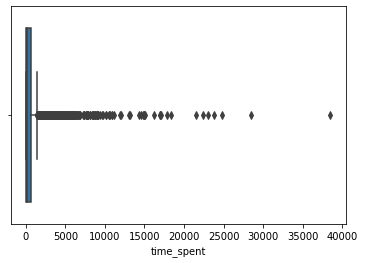

In [4]:
sns.boxplot(train_data['time_spent'])

In [5]:
train_data.drop(train_data[train_data['time_spent']>27000].index,axis=0,inplace=True)

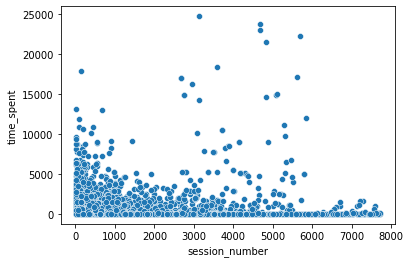

In [ ]:
sns.scatterplot(x=train_data['session_number'],y=train_data['time_spent'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


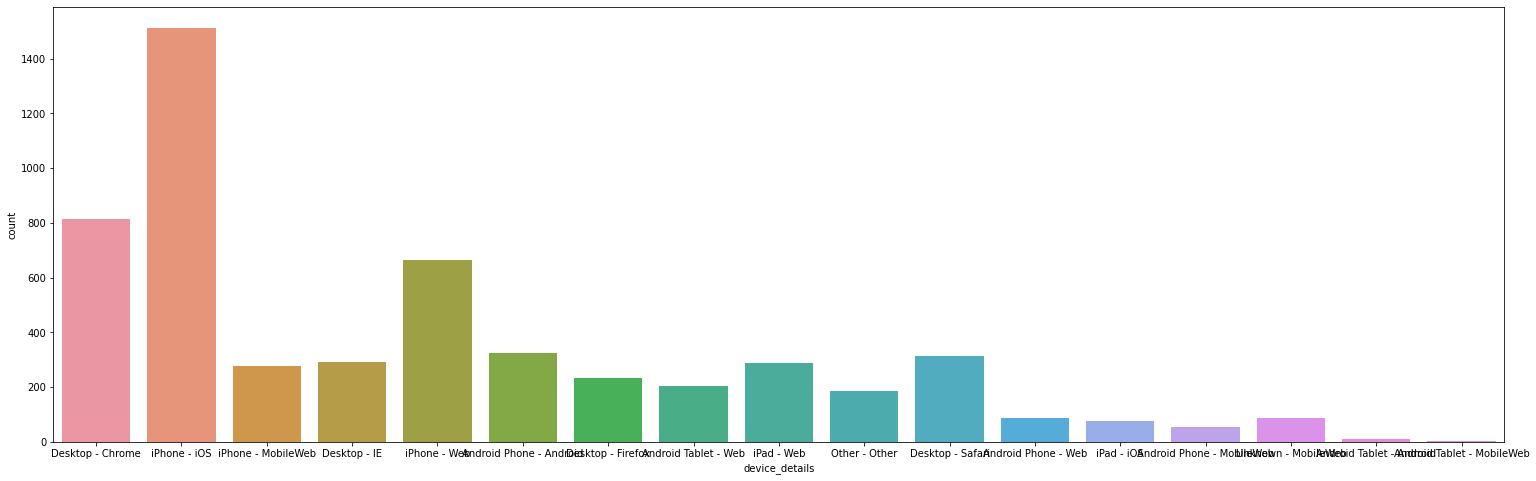

In [ ]:
fig=plt.figure(figsize=(26,8))
sns.countplot(train_data['device_details'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


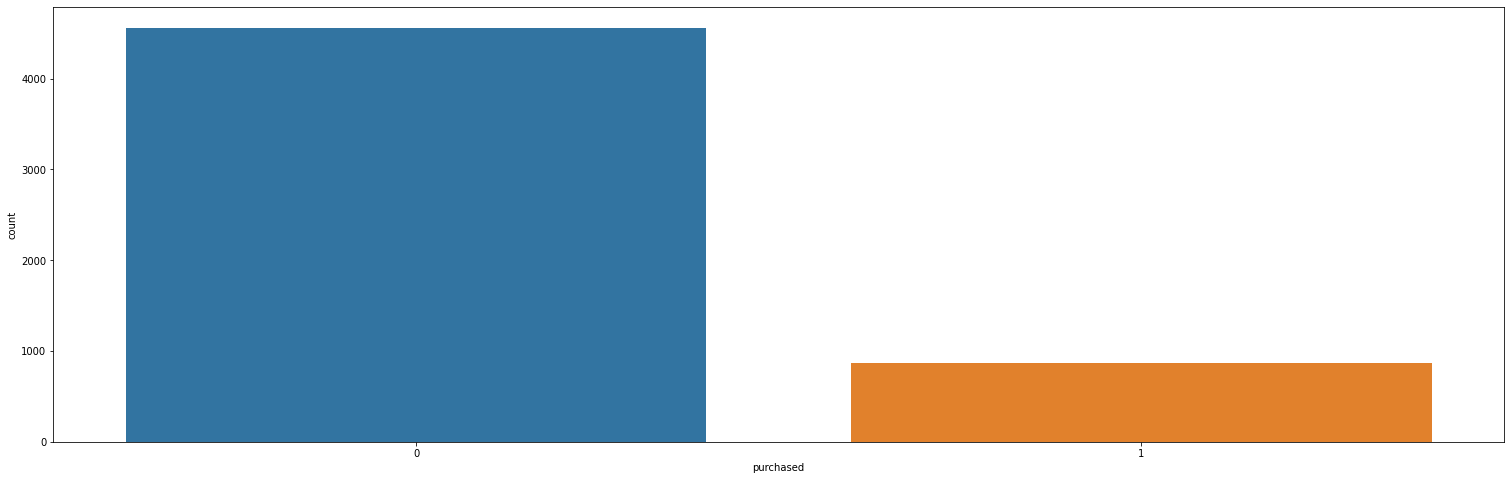

In [ ]:
fig=plt.figure(figsize=(26,8))
sns.countplot(train_data['purchased'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


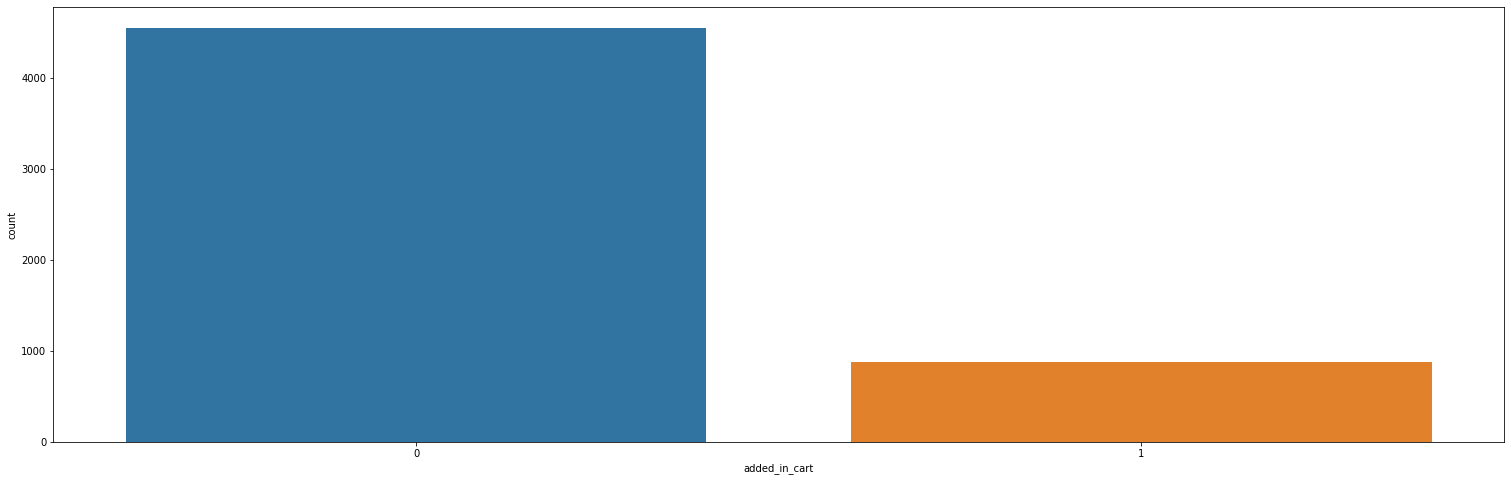

In [ ]:
fig=plt.figure(figsize=(26,8))
sns.countplot(train_data['added_in_cart'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


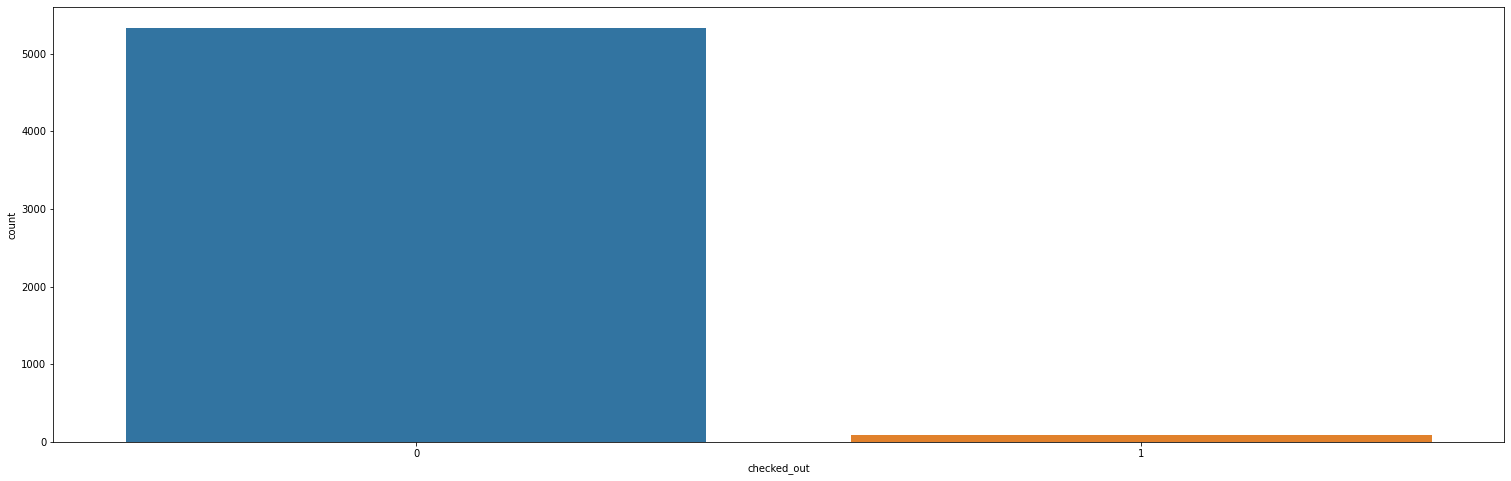

In [ ]:
fig=plt.figure(figsize=(26,8))
sns.countplot(train_data['checked_out'])

In [ ]:
train_data['client_agent'][4]

'Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like Mac OS X) AppleWebKit/537.51.2 (KHTML, like Gecko) Mobile/11D201'

# Metric

In [6]:
import numpy as np
import math
from keras import backend as K
import tensorflow as tf
from sklearn.metrics import mean_squared_log_error, make_scorer

def rmsle(true_y, predicted_y):
  true_y_=np.abs(true_y)
  predicted_y_=np.abs(predicted_y)
  score=mean_squared_log_error(true_y_,predicted_y_)
  return np.sqrt(score)

RMSLE=make_scorer(rmsle)

# Data Preprocessing

In [7]:
total_df=pd.concat([train_data.drop(['session_id','time_spent','client_agent'],axis=1),test_data.drop(['session_id','client_agent'],axis=1)],axis=0,ignore_index=True)

In [8]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   session_number  7754 non-null   int64 
 1   device_details  7754 non-null   object
 2   date            7754 non-null   object
 3   purchased       7754 non-null   int64 
 4   added_in_cart   7754 non-null   int64 
 5   checked_out     7754 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 363.6+ KB


In [9]:
total_df['date'] = pd.to_datetime(total_df.date, format='%Y-%m-%d')

In [10]:
total_df['year'] = total_df['date'].dt.year
total_df['month'] = total_df['date'].dt.month
total_df['week'] = total_df['date'].dt.week
total_df['Day'] = total_df['date'].dt.day
total_df['dayofweek'] = total_df['date'].dt.dayofweek

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
total_df.head(n=5)

,session_number,device_details,date,purchased,added_in_cart,checked_out,year,month,week,Day,dayofweek
0,715,Desktop - Chrome,2020-01-22,1,0,0,2020,1,4,22,2
1,55,iPhone - iOS,2020-02-27,1,0,0,2020,2,9,27,3
2,11,iPhone - MobileWeb,2019-08-01,0,0,0,2019,8,31,1,3
3,2794,Desktop - IE,2019-12-30,0,1,0,2019,12,1,30,0
4,3674,iPhone - Web,2019-09-10,0,0,0,2019,9,37,10,1


In [12]:
total_df['device_details'].unique()

array(['Desktop - Chrome', 'iPhone - iOS', 'iPhone - MobileWeb',
       'Desktop - IE', 'iPhone - Web', 'Android Phone - Android',
       'Desktop - Firefox', 'Android Tablet - Web', 'iPad - Web',
       'Other - Other', 'Desktop - Safari', 'Android Phone - Web',
       'iPad - iOS', 'Android Phone - MobileWeb', 'Unknown - MobileWeb',
       'Android Tablet - Android', 'Android Tablet - MobileWeb'],
      dtype=object)

In [14]:
def return_initial(s):
  t=s.split('-')
  return t[0]

total_df['device_details_name']=total_df['device_details'].apply(return_initial)

In [16]:
def return_last(s):
  t=s.split('-')
  return t[1]

total_df['device_details_browser']=total_df['device_details'].apply(return_last)

In [ ]:
total_df.head()

,session_number,device_details,date,purchased,added_in_cart,checked_out,year,month,week,Day,dayofweek,device_details_name,device_details_browser
0,715,Desktop - Chrome,2020-01-22,1,0,0,2020,1,4,22,2,Desktop,Chrome
1,55,iPhone - iOS,2020-02-27,1,0,0,2020,2,9,27,3,iPhone,iOS
2,11,iPhone - MobileWeb,2019-08-01,0,0,0,2019,8,31,1,3,iPhone,MobileWeb
3,2794,Desktop - IE,2019-12-30,0,1,0,2019,12,1,30,0,Desktop,IE
4,3674,iPhone - Web,2019-09-10,0,0,0,2019,9,37,10,1,iPhone,Web


In [ ]:
total_df['device_details_browser'].unique()

array([' Chrome', ' iOS', ' MobileWeb', ' IE', ' Web', ' Android',
       ' Firefox', ' Other', ' Safari'], dtype=object)

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   session_number          7754 non-null   int64         
 1   device_details          7754 non-null   object        
 2   date                    7754 non-null   datetime64[ns]
 3   purchased               7754 non-null   int64         
 4   added_in_cart           7754 non-null   int64         
 5   checked_out             7754 non-null   int64         
 6   year                    7754 non-null   int64         
 7   month                   7754 non-null   int64         
 8   week                    7754 non-null   int64         
 9   Day                     7754 non-null   int64         
 10  dayofweek               7754 non-null   int64         
 11  device_details_name     7754 non-null   object        
 12  device_details_browser  7754 non-null   object  

In [18]:
def mapper(name,df,how): # Custom Function for Label encoding.
  if how=='nums':
    sam_dict={}
    num=1
    for loc in df[name].unique():
      sam_dict.update([(loc,num)])
      num=num+1
    df[name]=df[name].map(sam_dict)
  elif how=='proba':
    an_dict={}
    for dec in df[name].unique():
      an_dict.update([(dec,int(df[name].value_counts()[dec]))])
    df[name]=df[name].map(an_dict)
    df_max=df[name].max()
    df[name]=df[name].apply(lambda x:x/df_max)

In [19]:
mapper('device_details',total_df,'nums')
mapper('device_details_name',total_df,'nums')
mapper('device_details_browser',total_df,'nums')

In [20]:
total_df['date'].max()

Timestamp('2020-04-23 00:00:00')

In [21]:
import datetime as dt
today_date = dt.date(2020,4,23)

In [22]:
total_df['date'] = pd.DatetimeIndex(total_df.date).date

In [23]:
total_df['Recency'] = total_df.date.apply(lambda x : (today_date - x).days)

In [24]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7754 entries, 0 to 7753
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   session_number          7754 non-null   int64 
 1   device_details          7754 non-null   int64 
 2   date                    7754 non-null   object
 3   purchased               7754 non-null   int64 
 4   added_in_cart           7754 non-null   int64 
 5   checked_out             7754 non-null   int64 
 6   year                    7754 non-null   int64 
 7   month                   7754 non-null   int64 
 8   week                    7754 non-null   int64 
 9   Day                     7754 non-null   int64 
 10  dayofweek               7754 non-null   int64 
 11  device_details_name     7754 non-null   int64 
 12  device_details_browser  7754 non-null   int64 
 13  Recency                 7754 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 848.2+ KB


In [25]:
total_df['session_number'].nunique()

700

In [26]:
total_df.columns

Index(['session_number', 'device_details', 'date', 'purchased',
       'added_in_cart', 'checked_out', 'year', 'month', 'week', 'Day',
       'dayofweek', 'device_details_name', 'device_details_browser',
       'Recency'],
      dtype='object')

In [27]:
cat_feats=['session_number','device_details','purchased','added_in_cart','checked_out','year','month','week','Day','dayofweek','device_details_name','device_details_browser']

In [28]:
train_data.shape

(5427, 9)

In [29]:
X_train=total_df.drop('date',axis=1)[0:5427]
X_test=total_df.drop('date',axis=1)[5427:]
Y=train_data['time_spent']

In [30]:
X_train.shape

(5427, 13)

In [32]:
X_train['time_spent']=Y

In [31]:
def mean_encoder(var_name,target_name):
  var_unique=list(X_train[var_name].unique())
  var_dict={}
  for item in var_unique:
    value=X_train[X_train[var_name]==item][target_name].mean()
    var_dict.update([(item,value)])
  return var_dict

In [33]:
for tar in ['time_spent','Recency']:
  for var in cat_feats:
    X_train[var+'_mean']=X_train[var].map(mean_encoder(var,tar))
    X_test[var+'_mean']=X_test[var].map(mean_encoder(var,tar))

In [34]:
X_train.drop('time_spent',axis=1,inplace=True)

In [35]:
X_train.shape, X_test.shape

((5427, 25), (2327, 25))

In [36]:
for cols in X_test.columns:
    try:
        X_test[cols].replace([np.inf,-np.inf],np.nan,inplace=True)
        X_test[cols]=X_test[cols].fillna(np.mean(X_test[cols]))
    except:
        continue

In [ ]:
'''
from sklearn.linear_model import BayesianRidge, LinearRegression, LassoLars, Ridge, ElasticNet, Lasso
from sklearn.model_selection import cross_val_score
'''

# Using LightGBM

In [ ]:
! pip install lightgbm==3.0

     |████████████████████████████████| 1.8MB 5.2MB/s 
  Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


In [ ]:
import lightgbm as lgb

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
#lgb_params={'num_leaves':[12,13,14,15,16,17,18,19,20,21,22,23,24,25,26],'depth':[3,4,5],'learning_rate':np.linspace(0.01,0.3,20)}

In [ ]:
#lgb_grid=GridSearchCV(estimator=lgb.LGBMRegressor(),cv=3,param_grid=lgb_params,verbose=2,scoring=RMSLE)#param_grid=lgb_params

In [ ]:
#lgb_grid.fit(X_train,Y)

In [ ]:
#lgb_grid.best_score_

2.0772340090912707

In [ ]:
#lgb_grid.best_params_

{'depth': 3, 'learning_rate': 0.01, 'num_leaves': 12}

In [ ]:
#lgb_model= lgb.LGBMRegressor(depth=3,num_leaves=12,learning_rate=0.01)

In [ ]:
#lgb_model.fit(X_train,np.log1p(Y))

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              depth=3, importance_type='split', learning_rate=0.01,
              max_depth=-1, min_child_samples=20, min_child_weight=0.001,
              min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=12,
              objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [ ]:
#lgb_pred=lgb_model.predict(X_test)

In [ ]:
#lgb_pred_df=pd.DataFrame(data=2.7182818284590452353602874713527**(lgb_pred),columns=['time_spent'])

In [ ]:
#lgb_pred_df.head()

,time_spent
0,320.689952
1,100.384408
2,320.689952
3,128.323568
4,104.727732


# Using Catboost

In [37]:
! pip install catboost

     |████████████████████████████████| 65.8MB 60kB/s 


In [38]:
import catboost as cb
from sklearn.model_selection import GridSearchCV

In [ ]:
cb_params={'depth':[2,3],'learning_rate':np.linspace(0.0001,0.001,15),'iterations':[3,4,5,6]}

In [ ]:
cb_grid=GridSearchCV(estimator=cb.CatBoostRegressor(verbose=0),param_grid=cb_params,scoring=RMSLE,cv=3,verbose=2)

In [ ]:
#cb_grid.fit(X_train,Y)

In [ ]:
cb_grid.best_params_

{'depth': 2, 'iterations': 3, 'learning_rate': 0.0001}

In [50]:
e=2.7182818284590452353602874713527

In [45]:
cb_model=cb.CatBoostRegressor(depth=2,iterations=3,learning_rate=0.00001,verbose=0)

In [46]:
cb_model.fit(X_train,np.log1p(Y))

In [47]:
cb_preds=cb_model.predict(X_test)

In [48]:
cb_preds_df=pd.DataFrame(data=e**(cb_preds),columns=['time_spent'])

In [49]:
cb_preds_df.head()

,time_spent
0,137.922744
1,137.914725
2,137.922744
3,137.914725
4,137.914725


In [51]:
cb_preds_df['time_spent'].unique()

array([137.9227438 , 137.91472481, 137.92291336, 137.92813243])

In [ ]:
cb_preds_df.to_csv('cb6.csv',index=False)